In [16]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("bread_basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [5]:
transactions= df.groupby('Transaction')['Item'].apply(list)

te= TransactionEncoder()
te_ary= te.fit(transactions).transform(transactions)
df_encoded=pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
frequent_itemsets= apriori(df_encoded, min_support=0.02, use_colnames= True)
print("\nTop Frequent Itemsets:\n")
print(frequent_itemsets.sort_values(by='support', ascending= False).head(50))


Top Frequent Itemsets:

     support                 itemsets
4   0.478394                 (Coffee)
1   0.327205                  (Bread)
16  0.142631                    (Tea)
3   0.103856                   (Cake)
20  0.090016          (Coffee, Bread)
11  0.086107                 (Pastry)
12  0.071844               (Sandwich)
9   0.061807              (Medialuna)
7   0.058320          (Hot chocolate)
23  0.054728           (Coffee, Cake)
5   0.054411                (Cookies)
31  0.049868            (Coffee, Tea)
29  0.047544         (Coffee, Pastry)
2   0.040042                (Brownie)
6   0.039197             (Farm House)
8   0.038563                  (Juice)
10  0.038457                 (Muffin)
30  0.038246       (Sandwich, Coffee)
0   0.036344              (Alfajores)
28  0.035182      (Coffee, Medialuna)
14  0.034548                  (Scone)
15  0.034443                   (Soup)
17  0.033597                  (Toast)
26  0.029583  (Hot chocolate, Coffee)
21  0.029160          (Pa

In [12]:
rules= association_rules(frequent_itemsets, metric= "lift", min_threshold=1.0)
rules= rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("\nTop Association rules:\n")
print(rules.sort_values(by='lift', ascending= False).head(50))


Top Association rules:

        antecedents      consequents   support  confidence      lift
5             (Tea)           (Cake)  0.023772    0.166667  1.604781
4            (Cake)            (Tea)  0.023772    0.228891  1.604781
19          (Toast)         (Coffee)  0.023666    0.704403  1.472431
18         (Coffee)          (Toast)  0.023666    0.049470  1.472431
13      (Medialuna)         (Coffee)  0.035182    0.569231  1.189878
12         (Coffee)      (Medialuna)  0.035182    0.073542  1.189878
15         (Pastry)         (Coffee)  0.047544    0.552147  1.154168
14         (Coffee)         (Pastry)  0.047544    0.099382  1.154168
11          (Juice)         (Coffee)  0.020602    0.534247  1.116750
10         (Coffee)          (Juice)  0.020602    0.043065  1.116750
16       (Sandwich)         (Coffee)  0.038246    0.532353  1.112792
17         (Coffee)       (Sandwich)  0.038246    0.079947  1.112792
3            (Cake)         (Coffee)  0.054728    0.526958  1.101515
2        

C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HRISHITA\anaconda3\envs\TF\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


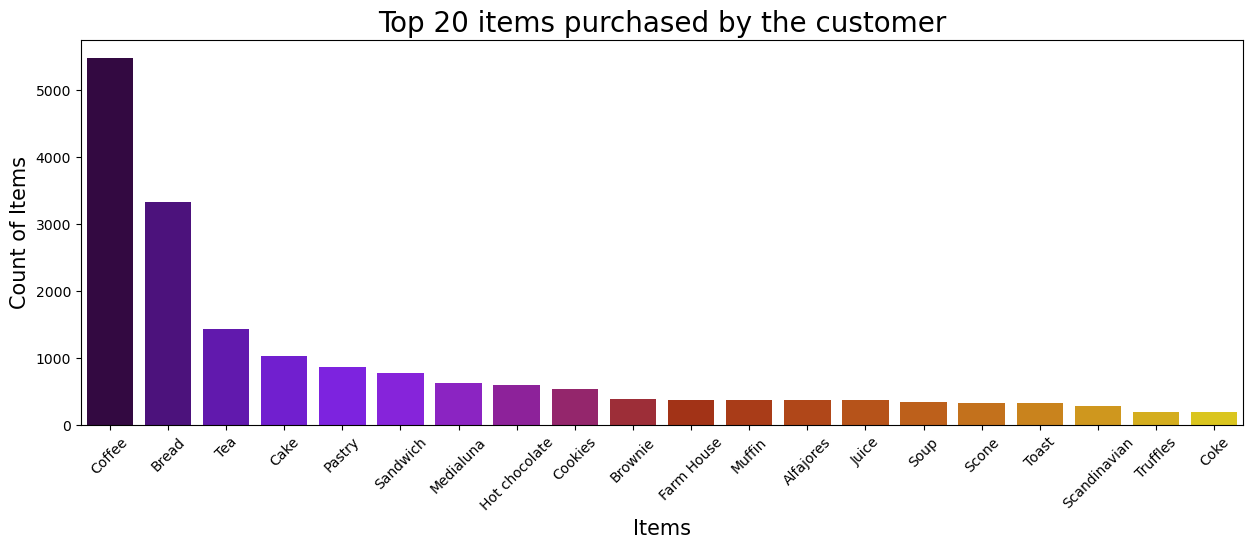

In [17]:
plt.figure(figsize= (15,5))
sns.barplot(x= df.Item.value_counts().head(20).index, y= df.Item.value_counts().head(20).values, palette='gnuplot')
plt.xlabel('Items', size=15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size= 15)
plt.title("Top 20 items purchased by the customer", color='black', size= 20)
plt.show()

In [18]:
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,support,confidence,lift
19,(Toast),(Coffee),0.023666,0.704403,1.472431
13,(Medialuna),(Coffee),0.035182,0.569231,1.189878
15,(Pastry),(Coffee),0.047544,0.552147,1.154168
11,(Juice),(Coffee),0.020602,0.534247,1.116750
16,(Sandwich),(Coffee),0.038246,0.532353,1.112792
3,(Cake),(Coffee),0.054728,0.526958,1.101515
7,(Cookies),(Coffee),0.028209,0.518447,1.083723
8,(Hot chocolate),(Coffee),0.029583,0.507246,1.060311
0,(Pastry),(Bread),0.029160,0.338650,1.034977
4,(Cake),(Tea),0.023772,0.228891,1.604781


In [19]:
rules.sort_values('confidence', ascending= False)

,antecedents,consequents,support,confidence,lift
19,(Toast),(Coffee),0.023666,0.704403,1.472431
13,(Medialuna),(Coffee),0.035182,0.569231,1.189878
15,(Pastry),(Coffee),0.047544,0.552147,1.154168
11,(Juice),(Coffee),0.020602,0.534247,1.116750
16,(Sandwich),(Coffee),0.038246,0.532353,1.112792
3,(Cake),(Coffee),0.054728,0.526958,1.101515
7,(Cookies),(Coffee),0.028209,0.518447,1.083723
8,(Hot chocolate),(Coffee),0.029583,0.507246,1.060311
0,(Pastry),(Bread),0.029160,0.338650,1.034977
4,(Cake),(Tea),0.023772,0.228891,1.604781
